In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install networkx
!pip3 install locationiq

resulting adjacency list =

mygraph = 
{'Gandhinagar': {'Bhopal': 599, 'Jaipur': 634, 'Mumbai': 553}, 'Bangalore': {'Amaravathi': 663, 'Panaji': 578, 'Chennai': 333, 'Thiruvanathapuram': 730, 'Mumbai': 980, 'Hyderabad': 569}, 'Shillong': {'Dispur': 91}, 'Patna': {'Kolkata': 583, 'Lucknow': 539, 'Ranchi': 327}, 'Ranchi': {'Bhubaneswar': 455, 'Kolkata': 395, 'Lucknow': 710, 'Patna': 327, 'Raipur': 580}, 'Jaipur': {'Chandigarh': 528, 'Gandhinagar': 634, 'Bhopal': 598, 'Lucknow': 574}, 'Kolkata': {'Bhubaneswar': 441, 'Ranchi': 395, 'Patna': 583, 'Gangtok': 675, 'Dispur': 1035}, 'Panaji': {'Bangalore': 578, 'Mumbai': 542}, 'Raipur': {'Amaravathi': 758, 'Bhubaneswar': 544, 'Hyderabad': 783, 'Mumbai': 1091, 'Bhopal': 614, 'Lucknow': 810, 'Ranchi': 580}, 'Dispur': {'Shillong': 91, 'Imphal': 482, 'Aizawl': 462, 'Agartala': 536, 'Itanagar': 323, 'Kohima': 350, 'Kolkata': 1035}, 'Mumbai': {'Bangalore': 980, 'Hyderabad': 719, 'Panaji': 542, 'Gandhinagar': 553, 'Bhopal': 776, 'Raipur': 1091}, 'Bhop

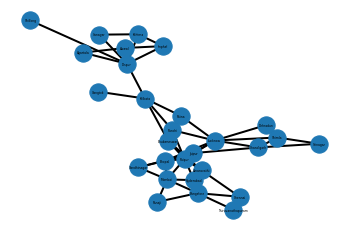

<Figure size 1000x4000 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
from locationiq.geocoder import LocationIQ
from math import sin, cos, radians, acos
import json
from queue import PriorityQueue

df = pd.read_csv("Indian_capitals2.csv",header = None,names =["city1","city2","distance"])
node_list = []
G = nx.Graph()
lst = []
for i,row in df.iterrows():
    G.add_edge(row['city1'], row['city2'], weight=row['distance'])
    node_list.append(row['city1'])
    node_list.append(row['city2'])

node_list = list(set(node_list))
res_dct = {node_list[i]:dict(G[node_list[i]]) for i in range(len(node_list))} 
print("resulting adjacency list =\n")
# for key,value in res_dct.items():
#     print("{}:{}".format(key,value),sep="\n")

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 10]
pos = nx.spring_layout(G,k = 0.99,iterations = 50)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=2)
# labels
nx.draw_networkx_labels(G, pos, font_size=3, font_family='sans-serif')

plt.axis('off')
print("mygraph = ")
plt.figure(figsize=(10,40), dpi=100)
# plt.show()

lis = []
for key, value in res_dct.items():
    lis.append(key)
    l = []
    for key, value in value.items():
        l.append(key)
        for key, value in value.items():
            l.append(value)
    r = {l[i]: l[i + 1] for i in range(0, len(l), 2)}

    lis.append(r)
GRAPH = {lis[i]: lis[i + 1] for i in range(0, len(lis), 2)}
print(GRAPH)



In [3]:

class Node:
    def __init__(self,state,g,h,p,parent_dist):
        self.state = state
        self.g = g
        self.h = h
        self.p = p
        self.parent_dist = parent_dist
        self.f = 0
        self.visited = False

In [4]:
class Problem:
    def __init__(self,state,final):
        self.state = state
        self.final = final

    def goalTest(self,state1):
        if state1 == self.final:
            return  True
        else:
            return False


In [5]:
class simpleProblemSolvingAgent:
    def __init__(self):
        self.seq = []
        self.state = None
    
    def problemStruct(self,state,goal):
        if not seq:
            state = self.formulateProblem(state,goal)
            goal= self.formulateGoal(state)
        
    def formulateProblem(self):
        raise NotImplementedError

    def formulateGoal(self):
        raise NotImplementedError


    def expandNode(self,node):
        for key,value in res_dct.items():
            if key == node:
                return [key for key,value in value.items()]

    def DFS(self,problem):
        self.seq = []
        frontier = deque()
        frontier.append(problem.state)
        explored = set()
        while frontier:
            # print(frontier)
            k = frontier.pop()
            self.seq.append(k)
            explored.add(k)
            child_list = self.expandNode(k)
            for child in child_list:
                if child not in explored and child not in frontier:
                    if problem.goalTest(child):
                        self.seq.append(child)
                        return self.seq
                    frontier.append(child)


    def BFS(self,problem):
        self.seq = []
        frontier = deque()
        frontier.append(problem.state)
        explored = set()
        
        while frontier:
            k = frontier.popleft()
            explored.add(k)
            self.seq.append(k)
            for child in self.expandNode(k):
                if child not in explored and child not in frontier:
                    if problem.goalTest(child):
                        self.seq.append(child)
                        return self.seq
                    frontier.append(child)


    def bidirectional_bfs(self,problem):
        path_left = []
        path_right = []
        frontier_left = deque()
        frontier_right = deque()
        frontier_left.append(problem.state)
        frontier_right.append(problem.final)
        explored = set()
        while frontier_right or frontier_left:
            if frontier_left:
                k  = frontier_left.popleft()
                explored.add(k)
                path_left.append(k)
                if k in frontier_right:
                    return [*path_left,*path_right[::-1]]
                for child in self.expandNode(k):
                    if child not in explored and child not in frontier_left:
                        if child in frontier_right:
                            path_left.append(child)
                            return [*path_left,*path_right[::-1]]
                        frontier_left.append(child)
                        


            if frontier_right:
                k = frontier_right.popleft()
                explored.add(k)
                path_right.append(k)
                if k in frontier_left:
                    return [*path_left,*path_right[::-1]]
                for child in self.expandNode(k):
                    if child not in explored and child not in frontier_right:
                        if child in frontier_left:
                            path_right.append(child)
                            return [*path_left,*path_right[::-1]]
                        frontier_right.append(child)


In [6]:
def h_sld(src, dest):

    geocoder = LocationIQ("5a04e85be375bb")
    bg = geocoder.geocode(src)[0]
    ch = geocoder.geocode(dest)[0]
    slat = radians(float(bg['lat']))
    slon = radians(float(bg['lon']))
    elat = radians(float(ch['lat']))
    elon = radians(float(ch['lon']))
    distance = 6371.01 * acos(sin(slat)*sin(elat) +
                              cos(slat)*cos(elat)*cos(slon-elon))
    return int(distance)

In [7]:
def strld(dest):
    arr = []
    for i in node_list:
        arr.append(h_sld(i,dest))
    return arr

In [8]:

def A_star_search(problem,lis,path = None):
    arr = []
    for i in range(len(node_list)):
        arr.append(node_list[i])
        arr.append(lis[i])
    straight_line = {arr[i]: arr[i + 1] for i in range(0, len(arr), 2)}

    source = problem.state
    destination = problem.final
    priority_queue, visited = PriorityQueue(), {}
    priority_queue.put((straight_line[source], 0, source, [source]))
    visited[source] = straight_line[source]
    while not priority_queue.empty():
        (heuristic, cost, vertex, path) = priority_queue.get()
        if vertex == destination:
            return heuristic, cost, path
        for next_node in GRAPH[vertex].keys():
            current_cost = cost + GRAPH[vertex][next_node]
            heuristic = current_cost + straight_line[next_node]
            if not next_node in visited or visited[next_node] >= heuristic:
                visited[next_node] = heuristic
                priority_queue.put(
                    (heuristic, current_cost, next_node, path + [next_node]))



In [9]:
tes = []
print("Enter source,dest")
print(node_list)
source = input()
dest = input()
p = Problem(source, dest)
print("please wait.....")
tes = strld(p.final)
psa = simpleProblemSolvingAgent()
print("choices available:-")
print("1:DFS")
print("2:BFS")
print("3:Bidirectional bFS")
print("4:A star")
t = int(input())
if t == 1:
    l = psa.DFS(p)
    print("->".join(l))

if t == 2:
    l = psa.BFS(p)
    print("->".join(l))

if t == 3:
    l = psa.bidirectional_bfs(p)
    print("->".join(l))

if t == 4:
    heu,cost,path = A_star_search(p,tes)
    print("Path is\n")
    print("->".join(path))
    print("Total cost=",cost)
    print("Heuristic=",heu)


Enter source,dest
['Gandhinagar', 'Bangalore', 'Shillong', 'Patna', 'Ranchi', 'Jaipur', 'Kolkata', 'Panaji', 'Raipur', 'Dispur', 'Mumbai', 'Bhopal', 'Amaravathi', 'Kohima', 'Srinagar', 'Agartala', 'Itanagar', 'Imphal', 'Hyderabad', 'Lucknow', 'Chandigarh', 'Bhubaneswar', 'Dehradun', 'Shimla', 'Chennai', 'Gangtok', 'Thiruvanathapuram', 'Aizawl']
Dispur
Ranchi
please wait.....
choices available:-
1:DFS
2:BFS
3:Bidirectional bFS
4:A star
4
Path is

Dispur->Kolkata->Ranchi
Total cost= 1430
Heuristic= 1430


In [10]:
def destIndex(dest):
    cop = [0 for x in range(len(dest)-1)]
    for i, x in enumerate(dest):
        if int(x):
            pl = dest.index(x)
            cop[int(x)-1] = (pl//3, pl % 3)
    return cop


In [20]:
def manhat(puz, dest):
    dist = 0
    cop = []
    b = destIndex(dest)
    cop.append([x for x in puz[0:3]])
    cop.append([x for x in puz[3:6]])
    cop.append([x for x in puz[6:9]])
    for i in range(len(cop)):
        for j in range(len(cop[0])):
            if int(cop[i][j]):
                dist += abs(i-b[int(cop[i][j])-1][0])
                dist += abs(j-b[int(cop[i][j])-1][1])
    return dist


In [29]:
def printpuz(path):
    for puz in path:
        print('\n')
        print(' '.join(element for element in puz[0:3]))
        print(' '.join(element for element in puz[3:6]))
        print(' '.join(element for element in puz[6:9]))
        print(" |")
        print("\|/")
#         print(" |")



In [30]:
def swap(cop, i, j):
    cop[i], cop[j] = cop[j], cop[i]


In [31]:
def newStates(puz):
    pl = puz.index('0')
    value = [ele for ele in puz]

    if pl == 0:
        temp = []
        cop = value.copy()
        swap(cop, 0, 1)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 0, 3)
        temp.append("".join(cop))
        return temp
    if pl == 1:
        temp = []
        cop = value.copy()
        swap(cop, 1, 0)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 1, 2)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 1, 4)
        temp.append("".join(cop))
        return temp
    if pl == 2:
        temp = []
        cop = value.copy()
        swap(cop, 2, 1)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 2, 5)
        temp.append("".join(cop))
        return temp
    if pl == 3:
        temp = []
        cop = value.copy()
        swap(cop, 3, 0)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 3, 4)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 3, 6)
        temp.append("".join(cop))
        return temp
    if pl == 4:
        temp = []
        cop = value.copy()
        swap(cop, 4, 1)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 4, 3)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 4, 5)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 4, 7)
        temp.append("".join(cop))
        return temp
    if pl == 5:
        temp = []
        cop = value.copy()
        swap(cop, 5, 2)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 5, 4)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 5, 8)
        temp.append("".join(cop))
        return temp
    if pl == 6:
        temp = []
        cop = value.copy()
        swap(cop, 6, 3)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 6, 7)
        temp.append("".join(cop))
        return temp
    if pl == 7:
        temp = []
        cop = value.copy()
        swap(cop, 7, 4)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 7, 6)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 7, 8)
        temp.append("".join(cop))
        return temp
    if pl == 8:
        temp = []
        cop = value.copy()
        swap(cop, 8, 5)
        temp.append("".join(cop))
        cop = value.copy()
        swap(cop, 8, 7)
        temp.append("".join(cop))
        return temp


In [32]:

def getPathCost(src, dest, explored):
    crnt_node = [x for x in explored if x[0] == dest]
    crnt_node = crnt_node[0]
    cost = crnt_node[3]+crnt_node[1]

    path = []
    while crnt_node[0] != src:
        path.insert(0, crnt_node[0])
        crnt_node = [x for x in explored if x[0] == crnt_node[4]]
        crnt_node = crnt_node[0]
    path.insert(0, src)
    return path, cost


In [33]:
def search(src, dest, searchMethod):
    open_list = [(src, 0, manhat(src, dest), 0, None)]
    explored = set()
    while True:
        if searchMethod == "Greedy":
            open_list = sorted(open_list, key=lambda x: x[2])
        if searchMethod == "AStar":
            open_list = sorted(open_list, key=lambda x: x[1]+x[2]+x[3])
        if not open_list:
            return ("false", -1)
        if dest in [x[0] for x in explored]:
            return getPathCost(src, dest, explored)
        if searchMethod == "DFS":
            crnt_node = open_list.pop()
        else:
            crnt_node = open_list.pop(0)
        if crnt_node[0] not in [x[0] for x in explored]:
            explored.add(crnt_node)
        neighs = newStates(crnt_node[0])
        for neigh in neighs:
            if neigh not in [x[0] for x in explored]:
                child = (neigh, 1, manhat(neigh, dest),
                         crnt_node[1]+crnt_node[3], crnt_node[0])
                open_list.append(child)


In [34]:
def Inv(puz):
    Count = 0
    for i in range(len(puz)):
        for j in range(i+1, len(puz)):
            if int(puz[j]) and int(puz[i]) and int(puz[i]) > int(puz[j]):
                Count += 1
    return Count

In [35]:
def ifSolvable(src, dest):
    c1 = Inv(src)
    c2 = Inv(dest)
    return ((c1 % 2) == (c2 % 2))


In [36]:
src = input("Enter source inform of single array(enter 0 as blank space)\n")
dest = input("Enter destination\n")
print("choices available:-")
print("1:DFS")
print("2:BFS")
print("3:Greedy BFS")
print("4:A star")
t = int(input())


if ifSolvable(src, dest):

    if t == 1:
        path_traversed, total_cost = search(src, dest, "DFS")

    if t == 2:
        path_traversed, total_cost = search(src, dest, "BFS")

    if t == 3:
        path_traversed, total_cost = search(src, dest, "Greedy")

    if t == 4:
        path_traversed, total_cost = search(src, dest, "AStar")


    print("path found=\n")
    printpuz(path_traversed)
    print("Total path cost = {}".format(total_cost))

else:
    print("Puzzle is not solvable")


Enter source inform of single array(enter 0 as blank space)
012345678
Enter destination
123456780
choices available:-
1:DFS
2:BFS
3:Greedy BFS
4:A star
4
path found=



0 1 2
3 4 5
6 7 8
 |
\|/


1 0 2
3 4 5
6 7 8
 |
\|/


1 4 2
3 0 5
6 7 8
 |
\|/


1 4 2
0 3 5
6 7 8
 |
\|/


1 4 2
6 3 5
0 7 8
 |
\|/


1 4 2
6 3 5
7 0 8
 |
\|/


1 4 2
6 3 5
7 8 0
 |
\|/


1 4 2
6 3 0
7 8 5
 |
\|/


1 4 2
6 0 3
7 8 5
 |
\|/


1 4 2
0 6 3
7 8 5
 |
\|/


1 4 2
7 6 3
0 8 5
 |
\|/


1 4 2
7 6 3
8 0 5
 |
\|/


1 4 2
7 0 3
8 6 5
 |
\|/


1 0 2
7 4 3
8 6 5
 |
\|/


1 2 0
7 4 3
8 6 5
 |
\|/


1 2 3
7 4 0
8 6 5
 |
\|/


1 2 3
7 4 5
8 6 0
 |
\|/


1 2 3
7 4 5
8 0 6
 |
\|/


1 2 3
7 4 5
0 8 6
 |
\|/


1 2 3
0 4 5
7 8 6
 |
\|/


1 2 3
4 0 5
7 8 6
 |
\|/


1 2 3
4 5 0
7 8 6
 |
\|/


1 2 3
4 5 6
7 8 0
 |
\|/
Total path cost = 22
